# Visualization with Matplotlib

Matplotlib is a multi-platform data visualization library build on NumPy arrays, and designed to work with the broader SciPy stack.

## General Matplotlib Tips

### Importing Matplotlib

The standard shorthands for Matplotlib are:

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

The `plt` interface is what we will use most often, as we shall see throughout the chapter. 

### Setting Styles

We will use the `plt.style` directive to choose an aesthetic style for our figures.

In [2]:
plt.style.use("classic")

### `show()` or No `show()`? How to Display Your Plots

There are three contexts when using Matplotlib, a script, in an IPython terminal, or in an IPython notebook.

#### Plotting from a script

If you are using Matplotlib within a scrupt, the function `plt.show()` is your friend. It starts an event loop, looks for all currently active figure objects, and opens one or more interactive windows that display your figure or figures. For example:

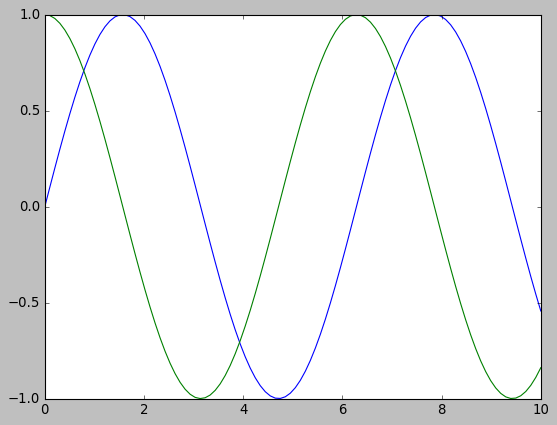

In [4]:
import numpy as np

x = np.linspace(0, 10, 100)

plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

plt.show()

The `plt.show()` command should be used *only once* per Python session, and is most often seen at the very end of the script. 

#### Plotting from an IPython shell

IPython is designed to work well with Matplotlib if you specify Matplotlib mode. To enable this mode, you can use the `%matplotlib` magic command after starting `ipython`:

In [5]:
%matplotlib

Using matplotlib backend: <object object at 0x1048709b0>


Now, any `plt` plot command will cause a figure window to open, and further commands can be run to update the plot. Some changes like modifying properties of a line that is already drawn will not draw automatically: to force an update, use `plt.draw()`. Using `plt.show()` in Matplotlib mdoe is not required. 

#### Plotting from an IPython notebook

With a notebook, you have two options to embed graphics directly in the notebook:

* `%matplotlib notebook` will lead to *interactive* plots embedded within the notebook
* `%matplotlib inline` will lead to *static* images of your plot embedded in the notebook

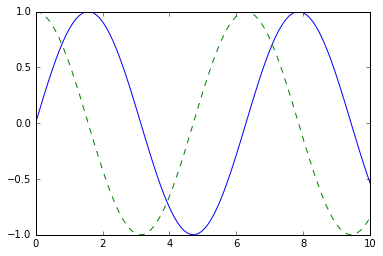

In [6]:
%matplotlib inline

x = np.linspace(0, 10, 100)

fig = plt.figure()
plt.plot(x, np.sin(x), "-")
plt.plot(x, np.cos(x), "--")

### Saving Figures to File

Saving a figure is done using the `savefig()` command:

In [7]:
fig.savefig("my_figure.png")

## Two Interfaces for the Price of One

Matplotlib supports a MATLAB-style state-based interface and a more powerful object-oriented interface. 

#### MATLAB-style Interface

The MATLAB-style tools are contained in the pyplot (`plt`) interface. For example:

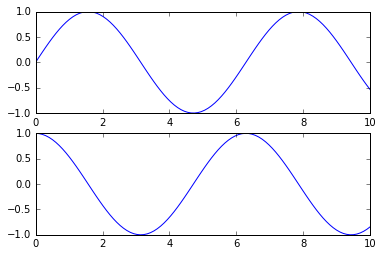

In [8]:
plt.figure() # create a plot figure

# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x))

# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x))

This interface is *stateful*: it keeps track of the "current" figure and axes, which are where all `plt` commands are applied. 

#### Object-oriented interface

In the object oriented interface the plotting functions are *methods* of explicit `Figure` and `Axes` objects. To recreate the previous plot, you might do the following:

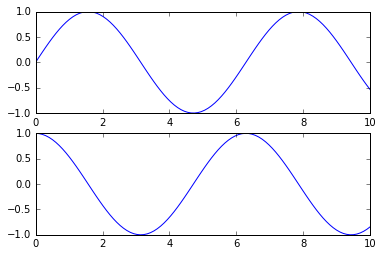

In [9]:
# First create a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2)

# call plot() method on the approprate object
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x))

# Simple Line PLots

For all Matplotlib plots we start by creating a figure and an axes:

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
import numpy as np

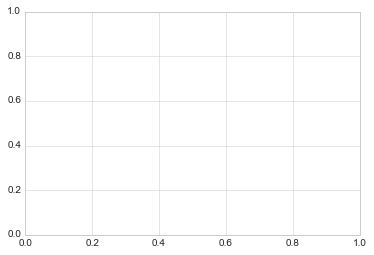

In [11]:
fig = plt.figure
ax = plt.axes()

In Matplotlib, the *figure* can be thought of as a single container that contains all the objects representing axes, graphics, text, and labels. The *axes* is what we see above: a bounding box with ticks and labels, which will eventually contain the plot elements that make up our visualization. 

Once we have created an axes, we can use the `ax.plot` function to plot some data:

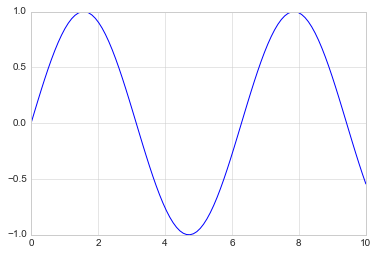

In [14]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 100)
ax.plot(x, np.sin(x))

Alternatively, we can use the pylab interface and let the figure and axes be created for us in the background:

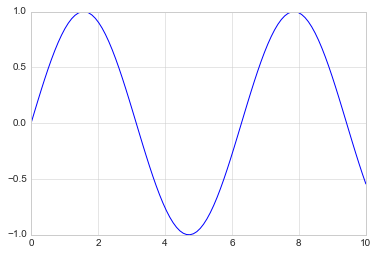

In [15]:
plt.plot(x, np.sin(x))

To create a single figure with multiple lines, we just call the `plot` function multiple times:

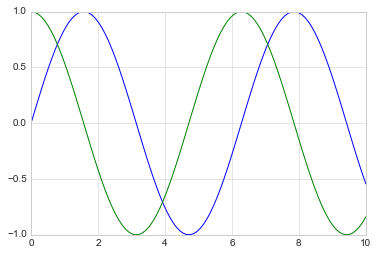

In [16]:
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

## Adjusting the Plot: Line Colors and Styles

The `plt.plot()` function takes additional arguments that can be used to specify the colors of lines:

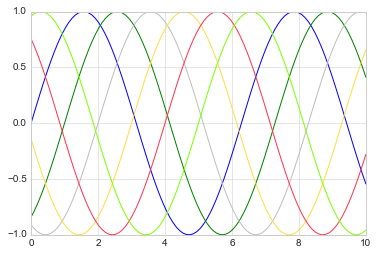

In [18]:
plt.plot(x, np.sin(x - 0), color='blue')        # specify color by name
plt.plot(x, np.sin(x - 1), color='g')           # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # Grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # Hex code (RRGGBB from 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1
plt.plot(x, np.sin(x - 5), color='chartreuse'); # all HTML color names supported

We can adjust the line style using the `linestyle` argument:

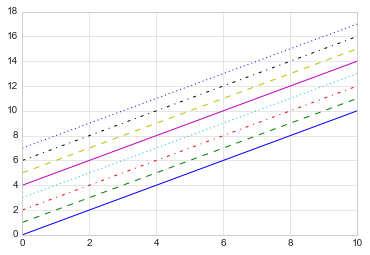

In [19]:
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');

# For short, you can use the following codes:
plt.plot(x, x + 4, linestyle='-')  # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':');  # dotted

The `linestyle` and `color` options can be combined into a single non-keyword argument to the `plt.plot()` function:

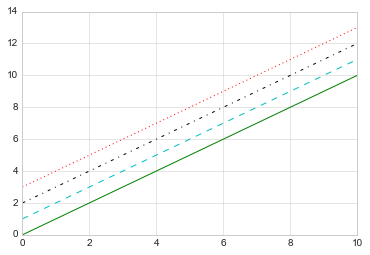

In [20]:
plt.plot(x, x + 0, '-g')  # solid green
plt.plot(x, x + 1, '--c') # dashed cyan
plt.plot(x, x + 2, '-.k') # dashdot black
plt.plot(x, x + 3, ':r');  # dotted red

## Adjusting the Plot: Axes Limits

You can specify the axis limits with `plt.xlim()` and `plt.ylim()` methods:

(-1.5, 1.5)

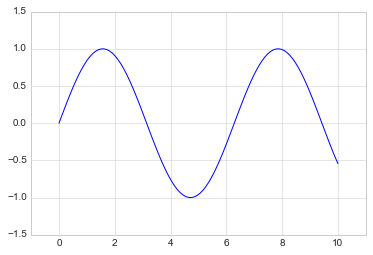

In [21]:
plt.plot(x, np.sin(x))

plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5)

If you need to reverse the axes, you just reverse the order of the arguments:

(1.2, -1.2)

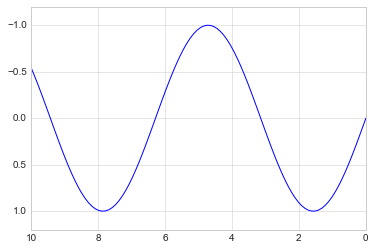

In [22]:
plt.plot(x, np.sin(x))

plt.xlim(10, 0)
plt.ylim(1.2, -1.2)

The `plt.axis()` method allows you to set the `x` and `y` limits with a single call, by passing a list which specifies `[xmin, xmax, ymin, ymax]`:

(-1.0, 11.0, -1.5, 1.5)

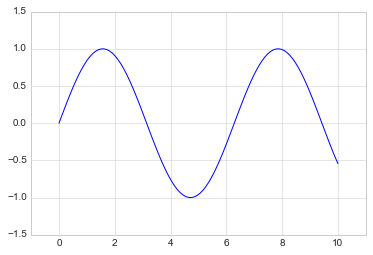

In [23]:
plt.plot(x, np.sin(x))
plt.axis([-1, 11, -1.5, 1.5])

## Labeling Plots

Titles and axis labels are the simplest such labels - there are methods that can be used to quickly set them:

Text(0, 0.5, 'sin(x)')

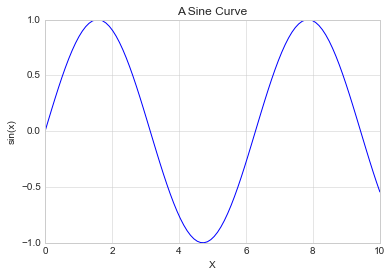

In [24]:
plt.plot(x, np.sin(x))
plt.title("A Sine Curve")
plt.xlabel("X")
plt.ylabel("sin(x)")

The position, size, and style of these labels can be adjusted using optional arguments to the function. 

When multiple lines are being shown within a single axes, it can be useful to create a plot legend that labels each line type. You can create a plot legend with `plt.legend()`. 

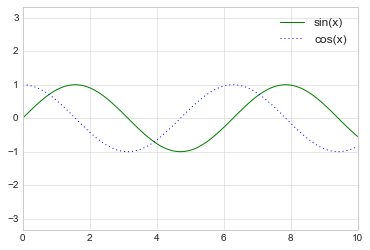

In [25]:
plt.plot(x, np.sin(x), "-g", label = "sin(x)")
plt.plot(x, np.cos(x), ":b", label = "cos(x)")
plt.axis("equal")
plt.legend()

## Aside: Matplotib Gotchas

When translating between MATLAB-style functions and object oriented methods, make the followign changes:

* `plt.xlabel()` → `ax.set_xlabel()`
* `plt.ylabel()` → `ax.set_ylabel()`
* `plt.xlim()` → `ax.set_xlim()`
* `plt.ylim()` → `ax.set_ylim()`
* `plt.title()` → `ax.set_title()`

You can also use the `ax.set()` method to set all these properties at once:

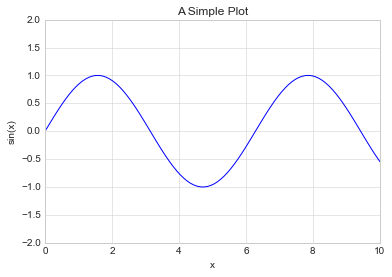

In [26]:
ax = plt.axes()
ax.plot(x, np.sin(x))
ax.set(xlim=(0, 10), ylim=(-2, 2),
       xlabel='x', ylabel='sin(x)',
       title='A Simple Plot');

# Simple Scatter Plots

